In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_FOLDER = '/home/theophile/TPS/Projects/sudoku_solver'

In [26]:
def print_cv_accuracy(scores):
    # The mean score and the 95% confidence interval of the score estimate
    accuracy_scores = 100 * scores  
    print("Accuracy: {:.1f} % (+/- {:.1f})".format(accuracy_scores.mean(), accuracy_scores.std() * 2))

# Import dataset

In [27]:
import joblib

DATASET_PATH = os.path.join(ROOT_FOLDER, 'datasets/chars74k_dataset.joblib')
data = joblib.load(DATASET_PATH)
X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

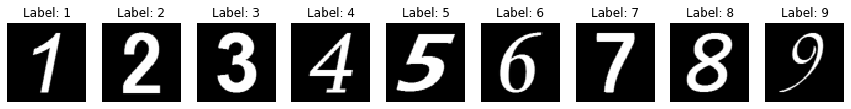

In [28]:
# use np.unique to get all unique values in the list of labels
labels, indexes = np.unique(y_train, return_index=True)
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)

for ax, label, idx in zip(axes, labels, indexes):
    digit = X_train[idx]    
    ax.imshow(digit, cmap='binary')
    ax.axis('off')
    ax.set_title("Label: " + str(label))

# Pixels as features

In [29]:
X_train_pix = np.array([img.ravel() for img in X_train])
X_test_pix = np.array([img.ravel() for img in X_test])

## Stochastic Gradient Descent (SGD)

First we can try a SGD Classifier (linear) with default parameters

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Cross validation on default SGD classifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000) # loss: 'hinge', penalty: 'l2'
scores = cross_val_score(sgd_clf, X_train_pix, y_train, cv=3, scoring="accuracy") 

print("Scores: ", scores) # Scores:  [0.93931939 0.95283019 0.95816243]
print_cv_accuracy(scores) # Accuracy: 95.0 % (+/- 1.6)

Scores:  [0.93931939 0.95283019 0.95816243]
Accuracy: 95.0 % (+/- 1.6)


Stochastic Gradient Descent is sensitive to feature scaling, so it is highly recommended to scale your data.

In [30]:
from sklearn.preprocessing import StandardScaler

# 1. Stochastic Gradient Descent is sensitive to feature scaling
scaler = StandardScaler()
X_train_pix_scaled = scaler.fit_transform(X_train_pix.astype(np.float64))

In [31]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
scores = cross_val_score(sgd_clf, X_train_pix_scaled, y_train, cv=3, scoring="accuracy")

print("Scores: ", scores) # Scores:  [0.96637966 0.95693191 0.9585726 ]
print_cv_accuracy(scores) # Accuracy: 96.1 % (+/- 0.8)

Scores:  [0.96637966 0.95693191 0.9585726 ]
Accuracy: 96.1 % (+/- 0.8)


Finetuning with Grid Search

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : 10.0**-np.arange(1,7),
    "penalty" : ["l2", "l1", "none"],
}

grid_search = GridSearchCV(sgd_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_train_pix_scaled, y_train)

/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient

/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/theophile/.local/share/virtualenvs/sudoku_solver-8pVE7cQh/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient

GridSearchCV(cv=3, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],


In [33]:
print(grid_search.best_score_) # 0.96635
print(grid_search.best_params_) # {'max_features': 'sqrt', 'n_estimators': 250}

0.9667795775578757
{'alpha': 1e-05, 'loss': 'squared_hinge', 'penalty': 'l2'}


### Testing and saving

In [35]:
# Train best model
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, alpha=1e-05, loss='squared_hinge', penalty='l2')
sgd_clf.fit(X_train_pix_scaled, y_train)

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import accuracy_score

# Evaluate on test set
X_test_pix_scaled = scaler.fit_transform(X_test_pix.astype(np.float64))
y_pred = sgd_clf.predict(X_test_pix_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.1f}".format(100*accuracy)) # Accuracy: 96.6

Accuracy: 96.6


In [40]:
# TODO: saving

import joblib

joblib_data = {
    'model': sgd_clf,
    'scaler': scaler
}

JOBLIB_OUTPUT = os.path.join(ROOT_FOLDER, 'models/chars74k/sgd_clf.joblib')

joblib.dump(joblib_data, JOBLIB_OUTPUT)

['/home/theophile/TPS/Projects/sudoku_solver/models/chars74k/sgd_clf.joblib']

## Random Forest